In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit.Chem import Draw
from sklearn import manifold
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from sklearn.preprocessing import StandardScaler

from rdkit.Chem import PandasTools

In [2]:
df = pd.read_csv('VEGF2.csv')
df = df.drop(['tid', 'standard_type', 'confidence_score', 'cmpd_pref_name', 'activity_comment'], axis=1)
df['mol'] = [Chem.MolFromSmiles(i) for i in df['canonical_smiles']]
df.head()

,cmpd_chembl_id,canonical_smiles,value,mol
0,CHEMBL356626,CCCOCc1ccc2c(c1)c3c4CNC(=O)c4c5c(Cc6ccccc56)c3...,7.890,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN5CCOCC5,6.600,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(cc2)c3cccc4[nH]nc(N)c34)c1,8.220,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,CHEMBL3754450,COc1cccc(c1)C(=O)CN2CCN(CC2)c3nnc(c4ccccc4)c5c...,5.470,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,CHEMBL383255,Cn1cnc(NCc2ccncc2)c1c3oc(Nc4ccc(OC(F)(F)F)cc4)nn3,7.105,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [3]:
finger = [Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in df.mol] #do vzdálenosti 2
df['finger'] = finger

In [4]:
drug = Chem.SDMolSupplier('drugbank.sdf')

In [5]:
ids=[]
for i in range(len(drug)):
    if drug[i] is not None:
        ids.append(drug[i].GetProp('DATABASE_ID')) 

In [6]:
inchi=[]
for i in range(len(drug)):
    if drug[i] is not None:
        inchi.append(drug[i].GetProp('INCHI_IDENTIFIER')) 

In [7]:
data = {'id': ids,
        'inchi': inchi}
drug_df = pd.DataFrame(data, columns = ['id', 'inchi'])

In [8]:
drug_df['mol'] = [Chem.inchi.MolFromInchi(i) for i in drug_df['inchi']]
drug_df = drug_df.dropna()

In [9]:
drug_finger = [Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in drug_df.mol]
drug_df['finger'] = drug_finger

In [10]:
df.head()

,cmpd_chembl_id,canonical_smiles,value,mol,finger
0,CHEMBL356626,CCCOCc1ccc2c(c1)c3c4CNC(=O)c4c5c(Cc6ccccc56)c3...,7.890,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN5CCOCC5,6.600,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(cc2)c3cccc4[nH]nc(N)c34)c1,8.220,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL3754450,COc1cccc(c1)C(=O)CN2CCN(CC2)c3nnc(c4ccccc4)c5c...,5.470,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL383255,Cn1cnc(NCc2ccncc2)c1c3oc(Nc4ccc(OC(F)(F)F)cc4)nn3,7.105,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
#t = df['cmpd_chembl_id'] + drug_df['id']
l = [Chem.MolFromSmiles(i) for i in df['canonical_smiles']] + [Chem.inchi.MolFromInchi(i) for i in drug_df['inchi']]
a = finger + drug_finger
s = 6715*['VEGF']+ len(drug_df)*['drug']

In [12]:
data = {'mol': l,
        'finger': a,
        'source': s}
d = pd.DataFrame(data, columns = ['mol', 'finger', 'source'])

In [34]:
d.head()

,mol,finger,source
0,<rdkit.Chem.rdchem.Mol object at 0x00000180D39...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",VEGF
1,<rdkit.Chem.rdchem.Mol object at 0x00000180D39...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",VEGF
2,<rdkit.Chem.rdchem.Mol object at 0x00000180D2C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VEGF
3,<rdkit.Chem.rdchem.Mol object at 0x00000180D2C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VEGF
4,<rdkit.Chem.rdchem.Mol object at 0x00000180D2C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VEGF


In [42]:
fingers = d.finger

In [45]:
#sparse = distance.pdist(fingers, metric="jaccard")
#distance = distance.squareform(sparse)
#clf = MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")

In [5]:
fps_mds = clf.fit_transform(distance)

shape:  (6715, 2)


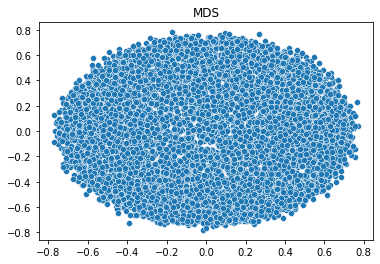

In [6]:
plot = sns.scatterplot(x=fps_mds[:,0], y=fps_mds[:,1]).set_title('MDS')
print('shape: ', fps_mds.shape)

# Scaffolds

In [13]:
sc1 = [MurckoScaffold.GetScaffoldForMol(x) for x in df.mol]
sc2 = [MurckoScaffold.MakeScaffoldGeneric(x) for x in sc1]
sc3 = [MurckoScaffold.GetScaffoldForMol(x) for x in sc2]

In [14]:
df["scaffold1"] = sc1
df["scaffold2"] = sc2
df["scaffold3"] = sc3

In [15]:
sc1 = [MurckoScaffold.GetScaffoldForMol(x) for x in drug_df.mol]
sc2 = [MurckoScaffold.MakeScaffoldGeneric(x) for x in sc1]
sc3 = [MurckoScaffold.GetScaffoldForMol(x) for x in sc2]

In [16]:
drug_df["scaffold1"] = sc1
drug_df["scaffold2"] = sc2
drug_df["scaffold3"] = sc3

C:\Users\domiz\Miniconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 12. Change the maxMols value to display more.
  warnings.warn(


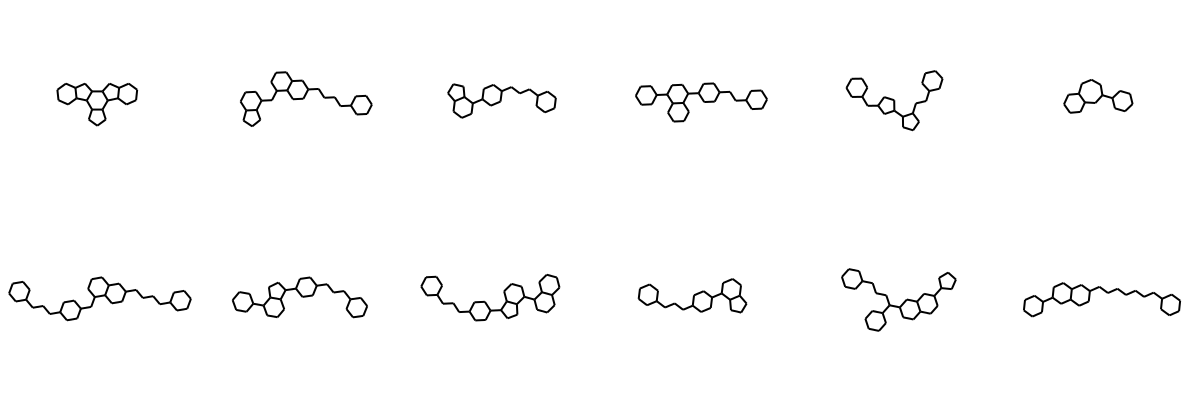

In [18]:
Draw.MolsToGridImage(df['scaffold3'], molsPerRow=6, maxMols=12)

### Nejcastejsi scaffoldy ve VEGF a drugBank

In [103]:
drug_scaf_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drug_df['scaffold3']) if mol]
drug_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drug_df.mol) if mol]
drug_scaf_smiles[:5]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1')]

In [20]:
VEGF_scaf_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(df['scaffold3']) if mol]
VEGF_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(df.mol) if mol]
VEGF_scaf_smiles[:5]

[(0, 'C1CCC2C(C1)CC1C3CC4CCCCC4C3C3CCCC3C21'),
 (1, 'C1CCC(CCCCC2CCC3C(CCCC3CC3CCCC4CCCC43)C2)CC1'),
 (2, 'C1CCC(CCCC2CCC(C3CCCC4CCCC43)CC2)CC1'),
 (3, 'C1CCC(CCC2CCC(C3CCC(C4CCCCC4)C4CCCCC34)CC2)CC1'),
 (4, 'C1CCC(CCC2CCCC2C2CCC(CC3CCCCC3)C2)CC1')]

In [126]:
scaffolds_VEGF = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in VEGF_scaf_smiles}
for ligand_idx, scaffoldsmiles in VEGF_scaf_smiles:
    scaffolds_VEGF[scaffoldsmiles].append(ligand_idx)
#scaffolds2ligands

In [134]:
scaffold_count_VEGF = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds_VEGF.items()]
scaffold_count_VEGF.sort(key=lambda x: x[1], reverse=True)
#len(scaffold_count_VEGF)
scaffold_count_VEGF[:10]

[('C1CCC(CC2CCCC3CCCCC32)CC1', 328),
 ('C1CCC(C2CCC3C(CCC3C3CCCCC3)C2)CC1', 178),
 ('C1CCC(CCCC2CCC(CC3CCCC(CCC4CC4)C3)CC2)CC1', 157),
 ('C1CCC(CCCC2CCC(C3CCCC4CCCC43)CC2)CC1', 151),
 ('C1CCC(CCC2CCC3C(CC4CCCCC4)CCCC3C2)CC1', 111),
 ('C1CCC(CCC2CCCC2CCC2CCCCC2)CC1', 89),
 ('C1CCC(C2CCC3CCCCC32)CC1', 89),
 ('C1CCC(CCCC2CCC(CC3CCCC(C4CCCC4)C3)CC2)CC1', 84),
 ('C1CCC(CCCC2CCC(C3CCC4CCCCC43)CC2)CC1', 79),
 ('C1CCC(CC2CCCCC2)CC1', 76)]

In [128]:
mols = [Chem.MolFromSmiles(scaffold) for scaffold, c in scaffold_ligandcount[:20]]

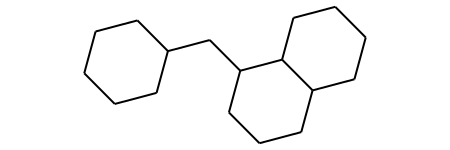

In [129]:
mols[0]

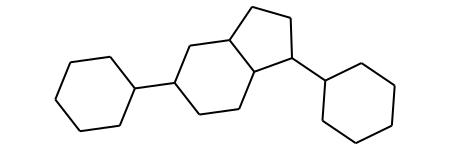

In [130]:
mols[1]

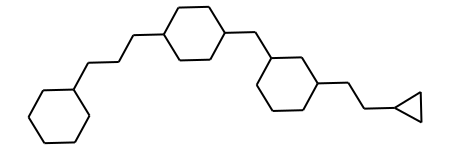

In [131]:
mols[2]

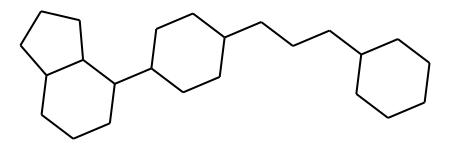

In [132]:
mols[3]

In [135]:
scaffolds_drug = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in drug_scaf_smiles}
for ligand_idx, scaffoldsmiles in drug_scaf_smiles:
    scaffolds_drug[scaffoldsmiles].append(ligand_idx)
#scaffolds2ligands

In [136]:
scaffold_count_drug = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds_drug.items()]
scaffold_count_drug.sort(key=lambda x: x[1], reverse=True)
#len(scaffold_ligandcount)
scaffold_count_drug[:10]

[('C1CCCCC1', 1037),
 ('', 986),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 187),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 177),
 ('C1CCC2C(C1)CCC2C1CCCC1', 167),
 ('C1CCC2CCCCC2C1', 167),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106)]

In [142]:
mols_drug = [Chem.MolFromSmiles(scaffold) for scaffold, c in scaffold_count_drug[:20]]

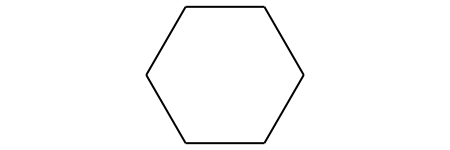

In [143]:
mols_drug[0]

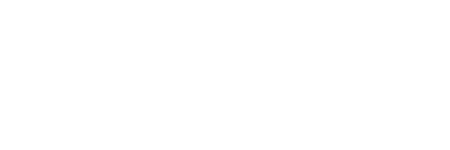

In [144]:
mols_drug[1]

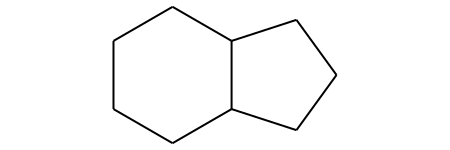

In [145]:
mols_drug[2]

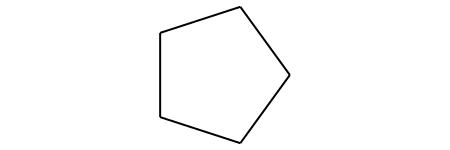

In [146]:
mols_drug[3]